<font size='8'>Salary Prediction</font>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


<font size='4'>Read data</font>

In [2]:
FILE_NAME = "Salary_Data.csv"
df = pd.read_csv(FILE_NAME, delimiter=',')
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


<font size='4'>Save a copy data</font>

In [3]:
df_raw = df[df['Age'] > 30]
print(df_raw._is_view)

False


<font size='6'>Data Cleansing</font>

<font size='4'>Rename columns</font>

In [4]:
print(df.columns)
def cleaning_rename_cols(df):
    df.columns = [col.replace(' ', '_').lower() for col in df.columns]
    print('rename column - Successful ...')

cleaning_rename_cols(df)
print(df.columns)

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')
rename column - Successful ...
Index(['age', 'gender', 'education_level', 'job_title', 'years_of_experience',
       'salary'],
      dtype='object')


<font size='4'>Check columns values</font>

In [5]:
for col in df.columns:
    # print(f"{col}:\n{df[col].info()}", end='\n\n')
    print(f"{col}:\n"
          f"null: {df[col].isnull().any()}\n"
          f"NaN:  {df[col].isna().any()}", end='\n\n')

age:
null: True
NaN:  True

gender:
null: True
NaN:  True

education_level:
null: True
NaN:  True

job_title:
null: True
NaN:  True

years_of_experience:
null: True
NaN:  True

salary:
null: True
NaN:  True



<font size='3'>remove Target column missing value rows</font>

In [6]:
# df = df.dropna(subset=['salary']).reset_index()          # create index column, keep all index
def cleaning_nan_salary(df) -> pd.DataFrame:
    return df.dropna(subset=['salary']).reset_index(drop=True)

df = cleaning_nan_salary(df)
# cleaning_nan_salary(df)
print(df['salary'].isna().any())
print(df['salary'].isnull().any())


False
False


<font size='3'>check Target column outliner, and address it</font>

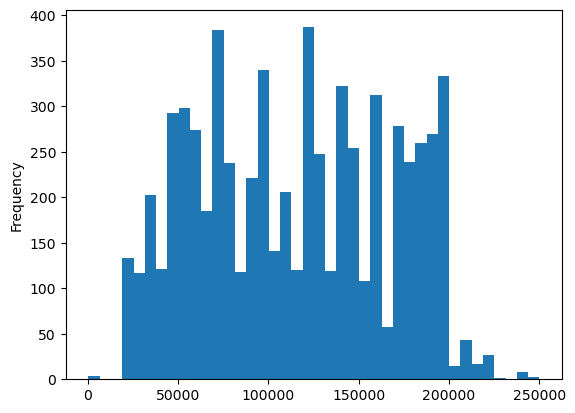

In [7]:
# plt.hist(df['salary'], bins=32)
# sns.violinplot(x=df['salary'])
df['salary'].plot(kind='hist', bins=40)
plt.show()

<font size='3'>check minimum, remove unreasonable data</font>

In [8]:
print(df.sort_values(by=['salary']).head(10), end='\n\n')

def cleaning_remove_salary_outlier(df, lower_bound=10000) -> pd.DataFrame:
    df['salary'] = df['salary'].astype('int32')
    df = df[df['salary'] > lower_bound]
    return df

df = cleaning_remove_salary_outlier(df)
print(df.sort_values(by=['salary']).head(10))

       age  gender    education_level                           job_title  \
258   29.0    Male         Bachelor's  Junior Business Operations Analyst   
4630  31.0  Female  Bachelor's Degree               Junior HR Coordinator   
1888  25.0  Female  Bachelor's Degree                 Front end Developer   
2652  23.0    Male                PhD           Software Engineer Manager   
4920  21.0  Female        High School         Junior Sales Representative   
4933  21.0  Female        High School         Junior Sales Representative   
4946  21.0  Female        High School         Junior Sales Representative   
4959  21.0  Female        High School         Junior Sales Representative   
4972  21.0  Female        High School         Junior Sales Representative   
4985  21.0  Female        High School         Junior Sales Representative   

      years_of_experience   salary  
258                   1.5    350.0  
4630                  4.0    500.0  
1888                  1.0    550.0  
2652

<font size='3'>check maximum, remove unreasonable data</font>

In [9]:
print(df.sort_values(by=['salary']).tail(10), end='\n\n')

# def remove_outlier_upper(df, col, upper_bound=10000):
#     return df[df[col] < upper_bound]


# df = remove_outlier_lower(df, 'salary')
# print(df.sort_values(by=['salary']).tail(10))

       age gender    education_level                 job_title  \
4288  51.0   Male                PhD            Data Scientist   
4378  51.0   Male                PhD            Data Scientist   
4348  51.0   Male                PhD            Data Scientist   
4303  51.0   Male                PhD            Data Scientist   
4363  51.0   Male                PhD            Data Scientist   
4333  51.0   Male                PhD            Data Scientist   
4273  51.0   Male                PhD            Data Scientist   
4998  45.0   Male  Bachelor's Degree         Financial Manager   
30    50.0   Male         Bachelor's                       CEO   
83    52.0   Male                PhD  Chief Technology Officer   

      years_of_experience  salary  
4288                 24.0  240000  
4378                 24.0  240000  
4348                 24.0  240000  
4303                 24.0  240000  
4363                 24.0  240000  
4333                 24.0  240000  
4273                 

In [10]:
def cleaning_salary(df):
    df = cleaning_nan_salary(df)
    print("cleaning nan salary - Successful ...")
    df = cleaning_remove_salary_outlier(df)
    print("cleaning salary outlier - Successful ...")
    return df

df = cleaning_salary(df)
df

cleaning nan salary - Successful ...
cleaning salary outlier - Successful ...


,age,gender,education_level,job_title,years_of_experience,salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000
1,28.0,Female,Master's,Data Analyst,3.0,65000
2,45.0,Male,PhD,Senior Manager,15.0,150000
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000
4,52.0,Male,Master's,Director,20.0,200000
...,...,...,...,...,...,...
6690,49.0,Female,PhD,Director of Marketing,20.0,200000
6691,32.0,Male,High School,Sales Associate,3.0,50000
6692,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000
6693,46.0,Male,Master's Degree,Marketing Manager,14.0,140000


In [11]:
# def remove_outlier(df, col, t_fac=2.5):
#     ## version 1
#     # mean_ = df[col].mean()
#     # std_ = df[col].std()
#     # upper_bound = mean_ + t_fac * std_
#     # lower_bound = mean_ - t_fac * std_


#     ## version 2
#     q1 = df[col].quantile(0.25)
#     q3 = df[col].quantile(0.75)
#     IQR = t_fac * (q3 - q1)
#     upper_bound, lower_bound = q3 + IQR, q1 - IQR

#     return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# df = remove_outlier(df, 'salary', t_fac=0.7)

# df['salary'].plot(kind='hist', bins=40)
# plt.show()

<font size='4'>Check again columns values</font>

In [12]:
for col in df.columns:
    print(f"{col}:\n"
          f"null: {df[col].isnull().any()}\n"
          f"NaN: {df[col].isna().any()}", end='\n\n')

age:
null: False
NaN: False

gender:
null: False
NaN: False

education_level:
null: True
NaN: True

job_title:
null: False
NaN: False

years_of_experience:
null: False
NaN: False

salary:
null: False
NaN: False



<font size='4'>Check each feature(column)</font>

<font size='3'>feature: age</font>

In [13]:
df['age'].unique() # no NaN

def cleaning_age(df):
    # df.loc[:, 'age'] = df['age'].astype('int32')
    df['age'] = df['age'].astype('int32')
    print('cleaning age - Successful ...')

cleaning_age(df)
df['age'].unique()

cleaning age - Successful ...


array([32, 28, 45, 36, 52, 29, 42, 31, 26, 38, 48, 35, 40, 27, 44, 33, 39,
       25, 51, 34, 47, 30, 41, 37, 24, 43, 50, 46, 49, 23, 53, 61, 57, 62,
       55, 56, 54, 60, 58, 22, 21], dtype=int32)

<font size='3'>feature: gender</font>

In [14]:
df['gender'].unique() # no NaN


def cleaning_gender(df):
    mapping = {'Male': 'male', 'Female': 'female', 'Other': 'other'}
    # df.loc[:, 'gender'] = df['gender'].map(mapping).fillna(df['gender'])
    df['gender'] = df['gender'].map(mapping).fillna(df['gender'])
    print('cleaning gender - Successful ...')

cleaning_gender(df)
df['gender'].unique()

cleaning gender - Successful ...


array(['male', 'female', 'other'], dtype=object)

<font size='3'>feature: education_level</font>

In [15]:
df['education_level'].unique()

def cleaning_edu(df):
    el_str = df['education_level'].str.lower()
    # df.loc[:, 'education_level'] = np.select(
    df['education_level'] = np.select(
        condlist=[
            el_str.str.contains('bachelor', na=False),
            el_str.str.contains('master', na=False),
            el_str.str.contains('phd', na=False),
            el_str.str.contains('high school', na=False),
        ],
        choicelist=[
            'Bachelor',
            'Master',
            'PhD',
            'High School'
        ],
        default='No Specified',
    ).astype('str')
    print('cleaning education level - Successful ...')


cleaning_edu(df)
df['education_level'].unique()

cleaning education level - Successful ...


array(['Bachelor', 'Master', 'PhD', 'No Specified', 'High School'],
      dtype=object)

<font size='3'>feature: job_title</font>

In [16]:
df['job_title'].unique()

def cleaning_job(df):
    df.loc[:, 'job_title'] = (
        df['job_title']
        # .str
        # .replace(r'\b(Junior|Juniour|Senior)\b\s+', '', regex=True)
        .str.strip()
        .astype('str')
    )
    print('cleaning job title - Successful ...')

cleaning_job(df)
df['job_title'].unique()

cleaning job title - Successful ...


array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

<font size='3'>feature: years_of_experience</font>

In [17]:
df['years_of_experience'].unique()

def cleaning_exp(df):
    # df.loc[:, 'years_of_experience'] = df['years_of_experience'].astype('float32')
    df['years_of_experience'] = df['years_of_experience'].astype('float32')
    print('cleaning years of experience - Successful ...')

cleaning_exp(df)
df['years_of_experience'].unique()

cleaning years of experience - Successful ...


array([ 5. ,  3. , 15. ,  7. , 20. ,  2. , 12. ,  4. ,  1. , 10. , 18. ,
        6. , 14. , 16. ,  0. , 22. , 19. ,  9. , 13. , 11. , 25. , 21. ,
        8. , 17. , 23. , 24. ,  0.5,  1.5, 31. , 30. , 28. , 33. , 27. ,
       34. , 29. , 26. , 32. ], dtype=float32)

In [18]:
def data_cleaning(df, has_target=False):
    cleaning_rename_cols(df)
    if has_target:
        df = cleaning_salary(df)
    cleaning_age(df)
    cleaning_gender(df)
    cleaning_edu(df)
    cleaning_job(df)
    cleaning_exp(df)

    print("... Finishing Cleaning Process ...")

data_cleaning(df, has_target=True)

rename column - Successful ...
cleaning nan salary - Successful ...
cleaning salary outlier - Successful ...
cleaning age - Successful ...
cleaning gender - Successful ...
cleaning education level - Successful ...
cleaning job title - Successful ...
cleaning years of experience - Successful ...
... Finishing Cleaning Process ...


<font size='6'>Data Visualization</font>

In [19]:
df

,age,gender,education_level,job_title,years_of_experience,salary
0,32,male,Bachelor,Software Engineer,5.0,90000
1,28,female,Master,Data Analyst,3.0,65000
2,45,male,PhD,Senior Manager,15.0,150000
3,36,female,Bachelor,Sales Associate,7.0,60000
4,52,male,Master,Director,20.0,200000
...,...,...,...,...,...,...
6690,49,female,PhD,Director of Marketing,20.0,200000
6691,32,male,High School,Sales Associate,3.0,50000
6692,30,female,Bachelor,Financial Manager,4.0,55000
6693,46,male,Master,Marketing Manager,14.0,140000


In [20]:
gen_ord = ['female', 'male', 'other']
df['gender'] = pd.Categorical(df['gender'], categories=gen_ord, ordered=True)

edu_ord = ['No Specified', 'High School', 'Bachelor', 'Master', 'PhD']
df['education_level'] = pd.Categorical(df['education_level'], categories=edu_ord, ordered=True)

## set save images file
images_dir = os.path.join(os.getcwd(), 'images')
os.makedirs(images_dir, exist_ok=True)

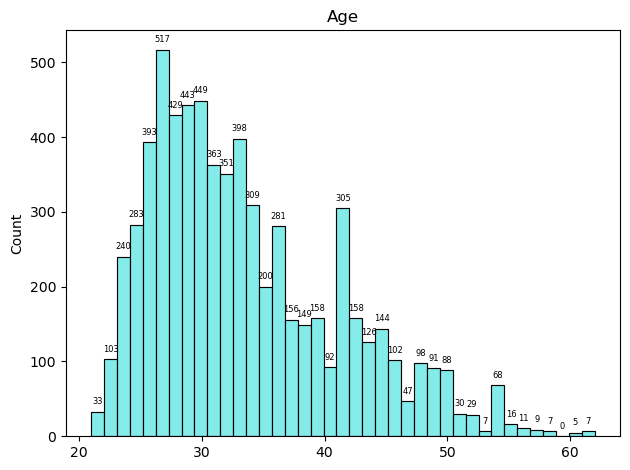

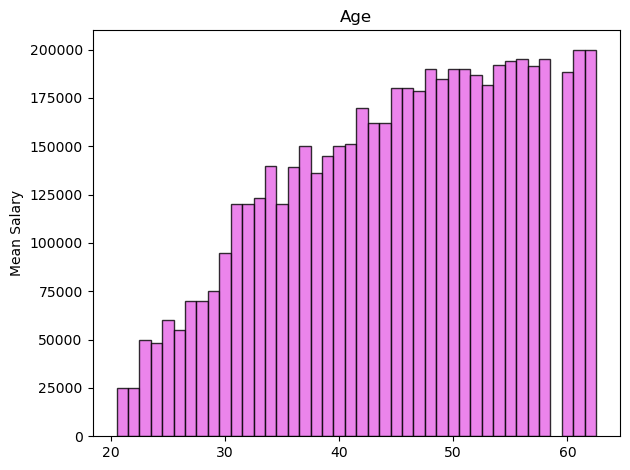

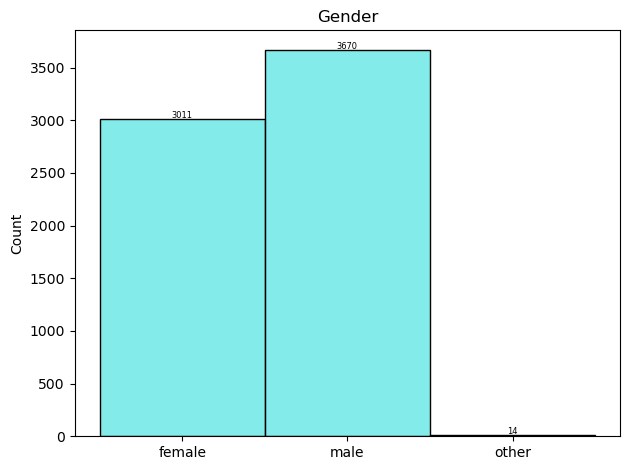

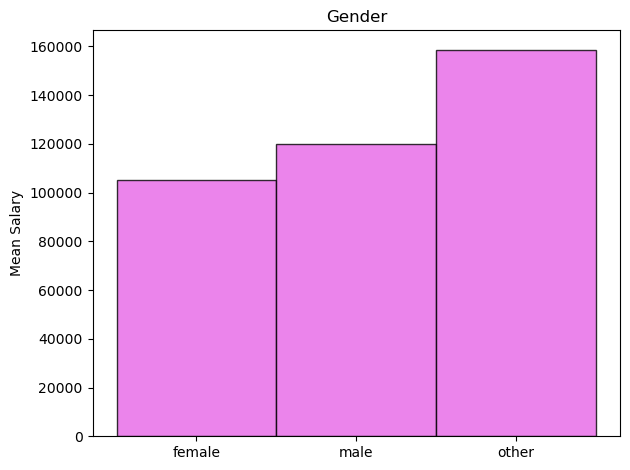

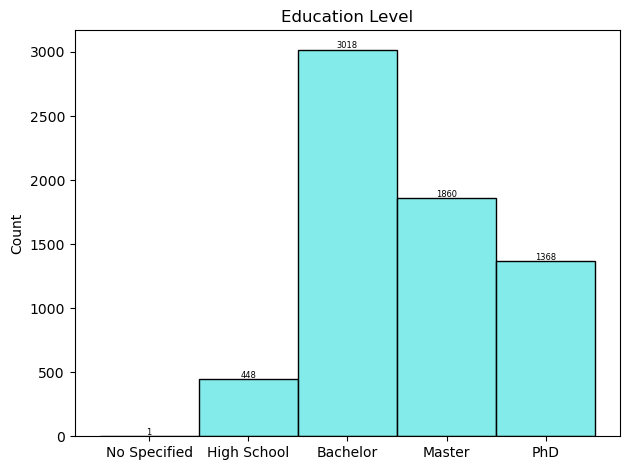

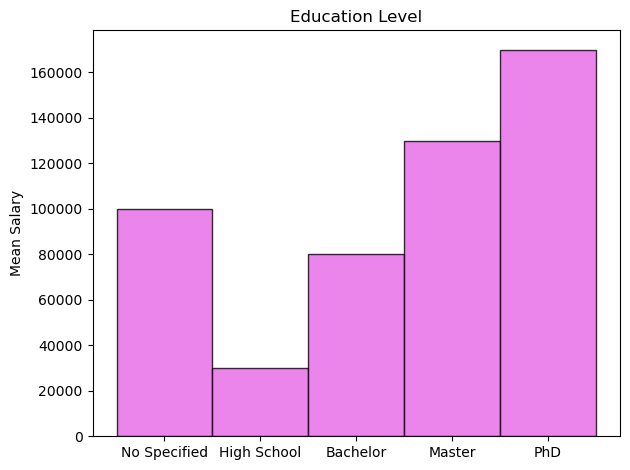

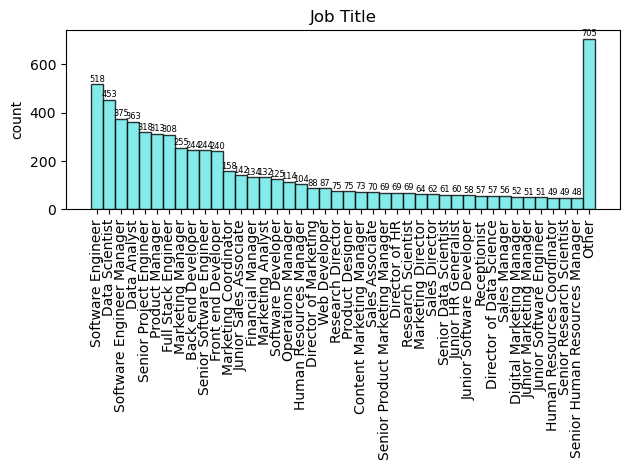

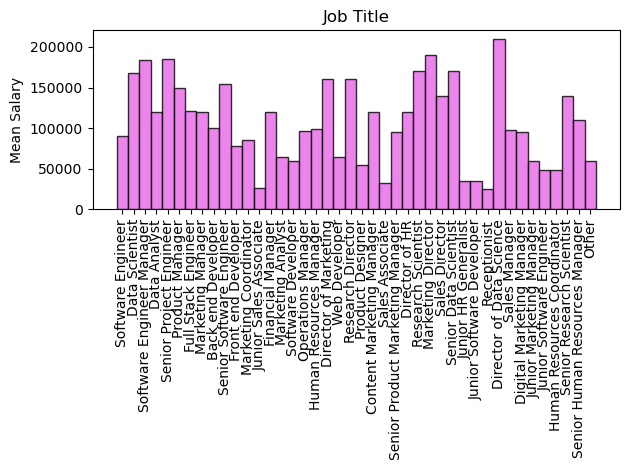

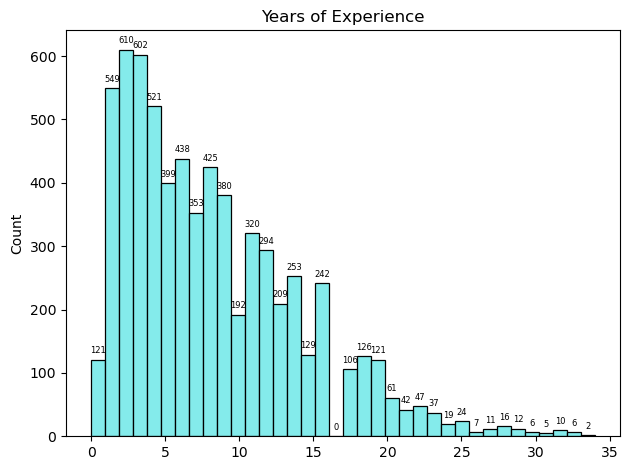

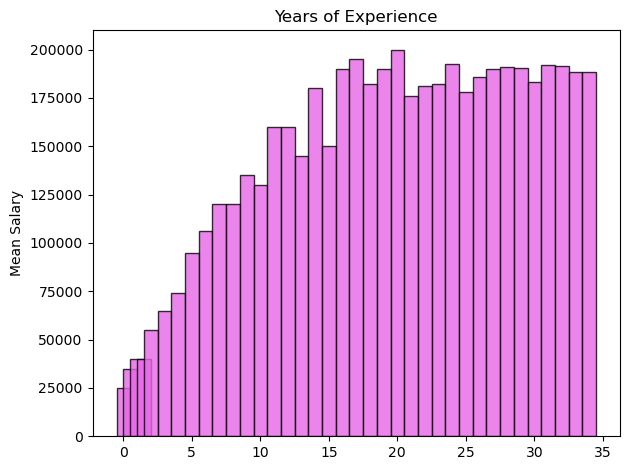

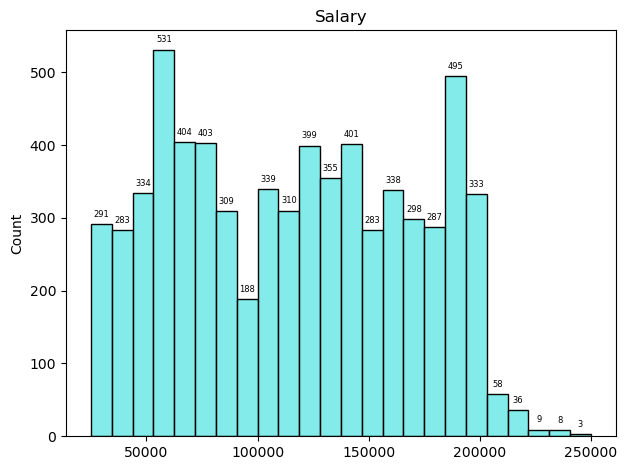

In [21]:
def show_plot(df, col):
    title_ = col

    ## show distribution
    if col == 'job_title':
        plt.xticks(rotation=90)

        ## group jobs that less than 45
        threshold = 45
        agg_job = df[col].value_counts()
        valid_job = agg_job[agg_job > threshold]
        valid_job.loc['Other'] = agg_job[agg_job <= threshold].sum()

        ## plot barplot
        bars = sns.barplot(data=valid_job,
                           color=(0.4, 0.9, 0.9),
                           edgecolor='black',
                           saturation=1,
                           alpha=0.8,
                           width=1)
        bars.margins(x=0.05)

    else :
        ## plot histgram
        bars = sns.histplot(data=df,
                            x=col,
                            color=(0.4, 0.9, 0.9),
                            alpha=0.8)

    ## indicate number on bar
    for bar in bars.patches:
        bbox = bar.get_bbox()
        x0 = bbox.x0
        width = bbox.width
        height = bbox.y1 - bbox.y0
        x_position = x0 + width / 2
        bars.text(x=x_position, y=height + 10,
                  s=f"{int(height)}",
                  ha='center',
                  fontsize=6)

    if '_' not in title_:
        title_ = title_[0].upper() + title_[1:]
    else :
        title_ = " ".join([n_split.capitalize()
                           if n_split != 'of'
                           else n_split
                           for n_split in title_.split('_')])

    plt.xlabel('')
    plt.title(title_)
    plt.tight_layout()

    ## save image
    fig_fname = f'{col}_distribution.png'
    plt.savefig(os.path.join(images_dir, fig_fname),
                bbox_inches='tight')

    ## plot image
    plt.show()

    if col == 'salary':
        return

    ## get feature mean|median|mode with target feature
    ## mode
    # d = (df
    #      .groupby([col], observed=False)['salary']
    #      .agg(lambda x: pd.Series.mode(x)[0]))
    ## quantile
    d = df.groupby([col], observed=False)['salary'].quantile(0.5)

    if col == 'job_title':
        plt.xticks(rotation=90)
        agg_job = df[col].value_counts()

        ## get job title that exceed threshold
        valid_job_index = agg_job[agg_job > threshold].index

        temp_ = df[[col, 'salary']].copy()
        ## create a df, remain jobs exceed threshold,
        ## set the rest jobs 
        temp_[col] = temp_[col].where(
            temp_[col].isin(valid_job_index), other='Other')
        
        ## mode
        # d = (temp_
        #      .groupby([col])['salary']
        #      .agg(lambda x: pd.Series.mode(x)[0]))
        ## quantile
        d = temp_.groupby([col], observed=False)['salary'].quantile(0.5)

        valid_job_index = list(valid_job_index) + ['Other']
        d = d.reindex(valid_job_index)

    plt.bar(d.index, d.values, width=1, color=(0.9, 0.4, 0.9),
            edgecolor='black', alpha=0.8)

    plt.xlabel('')
    plt.ylabel('Mean Salary')
    plt.title(title_)
    plt.tight_layout()

    ## save image
    fig_fname = f'{col}_salary_relation.png'
    plt.savefig(os.path.join(images_dir, fig_fname),
                bbox_inches='tight')

    ## plot image
    plt.show()




for col in df.columns:
    show_plot(df, col)

In [22]:
df_cleaned = df.copy()
df_cleaned

,age,gender,education_level,job_title,years_of_experience,salary
0,32,male,Bachelor,Software Engineer,5.0,90000
1,28,female,Master,Data Analyst,3.0,65000
2,45,male,PhD,Senior Manager,15.0,150000
3,36,female,Bachelor,Sales Associate,7.0,60000
4,52,male,Master,Director,20.0,200000
...,...,...,...,...,...,...
6690,49,female,PhD,Director of Marketing,20.0,200000
6691,32,male,High School,Sales Associate,3.0,50000
6692,30,female,Bachelor,Financial Manager,4.0,55000
6693,46,male,Master,Marketing Manager,14.0,140000


<font size='6'>Data Spliting</font>

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


In [25]:
# train set size = 0.8
# test set size  = 0.2

X_train, X_test, y_train, y_test \
    = train_test_split(X, y, test_size=0.2, random_state=1234)

X_train
# y_train
X_test
# y_test

,age,gender,education_level,job_title,years_of_experience
6565,36,male,Bachelor,Sales Director,6.0
1514,54,male,PhD,Software Engineer Manager,17.0
6237,29,male,Bachelor,Marketing Analyst,4.0
5460,26,female,Bachelor,Social Media Manager,3.0
5314,28,male,Bachelor,Product Designer,3.0
...,...,...,...,...,...
4473,41,male,PhD,Data Scientist,15.0
6617,28,male,PhD,Marketing Manager,4.0
1036,25,female,Bachelor,Data Analyst,2.0
2008,31,female,Bachelor,Front end Developer,6.0


<font size='6'>Data Preprocessing</font>

In [26]:
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    PolynomialFeatures,
    StandardScaler,
)
from category_encoders import TargetEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import set_config


In [27]:
X_train.iloc[20:30]

,age,gender,education_level,job_title,years_of_experience
5269,36,female,Master,Marketing Director,11.0
5989,36,female,PhD,Research Scientist,12.0
2653,41,male,PhD,Data Scientist,15.0
5960,27,male,Bachelor,Software Engineer,3.0
581,24,male,Bachelor,Data Analyst,1.0
2380,49,female,Bachelor,Back end Developer,19.0
4807,36,male,PhD,Senior Research Scientist,11.0
6151,27,male,Bachelor,Product Designer,2.0
149,45,male,Master,Director of Sales,19.0
2723,34,male,Master,Data Scientist,9.0


<font size='4' color='lightblue'>No Polynomial</font>

In [28]:
numeric_cols = ['age', 'years_of_experience']
onehot_cols = ['gender']
ord_cols = ['education_level']
ord_order = ['No Specified', 'High School', 'Bachelor', 'Master', 'PhD']
tar_cols = ['job_title']

In [43]:
numeric_pipe = Pipeline([
    ('scaler', StandardScaler()),
])

onehot_pipe = Pipeline([
    ('one-hot', OneHotEncoder(sparse_output=False,
                              handle_unknown='ignore'))
])

ordinal_pipe = Pipeline([
    ('ordinal', OrdinalEncoder(categories=[ord_order]))
])

target_pipe = Pipeline([
    ('tra_encode', TargetEncoder(cols=tar_cols)),
    ('tar_scaler', StandardScaler()),
])

set_config(transform_output='pandas')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipe, numeric_cols),
        ('cat_1', onehot_pipe, onehot_cols),
        ('cat_2', ordinal_pipe, ord_cols),
        ('tar', target_pipe, tar_cols),
    ],
    remainder='passthrough',
    verbose_feature_names_out=False,
)

X_train_ = preprocessor.fit_transform(X_train, y_train)
X_train_

X_test_ = preprocessor.transform(X_test)
X_test_



,age,years_of_experience,gender_female,gender_male,gender_other,education_level,job_title
6565,0.303821,-0.346411,0.0,1.0,0.0,2.0,0.083906
1514,2.651778,1.451595,0.0,1.0,0.0,4.0,1.393586
6237,-0.609273,-0.673322,0.0,1.0,0.0,2.0,-1.357287
5460,-1.000600,-0.836777,1.0,0.0,0.0,2.0,-0.488397
5314,-0.739716,-0.836777,0.0,1.0,0.0,2.0,-1.508020
...,...,...,...,...,...,...,...
4473,0.956031,1.124685,0.0,1.0,0.0,4.0,1.224235
6617,-0.739716,-0.673322,0.0,1.0,0.0,4.0,0.087862
1036,-1.131042,-1.000232,1.0,0.0,0.0,2.0,0.146082
2008,-0.348389,-0.346411,1.0,0.0,0.0,2.0,-0.804410


<font size='4' color='lightblue'>Polynomial</font>

In [ ]:
# is_poly = True

# # ordinal_ord = ['No Specified', 'High School', 'Bachelor', 'Master', 'PhD']
# if is_poly: 
#     poly_feature_col = ['age', 'years_of_experience']
#     # poly_feature_col = ['age', 'years_of_experience',
#     #                     'education_level', 'job_title']
#     scaler_col = ['age', 'job_title',
#                   'years_of_experience', 'education_level',
#                   'age^2', 'years_of_experience^2',
#                   'age years_of_experience']
# else :
#     scaler_col = ['age', 'job_title',
#                   'years_of_experience', 'education_level']


In [ ]:
# set_config(transform_output='pandas')

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('gen_encoder',
#          OneHotEncoder(sparse_output=False),
#          ['gender']),
#         # ('edu_encoder',
#         #  OrdinalEncoder(categories=[ordinal_ord]),
#         # ['education_level']),
#     ],
#     remainder='passthrough',
#     verbose_feature_names_out=False,
# )

# poly_step = ColumnTransformer(
#     transformers=[
#         ('poly',
#          PolynomialFeatures(include_bias=False),
#          poly_feature_col),
#     ],
#     remainder='passthrough',
#     verbose_feature_names_out=False,
# )

# scaler_step = ColumnTransformer(
#     transformers=[
#         ('scaler', StandardScaler(), scaler_col)
#     ],
#     remainder='passthrough',
#     verbose_feature_names_out=False,
# )

# if is_poly: 
#     features_pipeline = Pipeline([
#         ('preprocessor', preprocessor),
#         ('job_encode', TargetEncoder(cols=['job_title', 'education_level'])),
#         ('poly', poly_step),
#         ('scaler', scaler_step),
#     ])
# else :
#     features_pipeline = Pipeline([
#         ('preprocessor', preprocessor),
#         ('job_encode', TargetEncoder(cols=['job_title'])),
#         ('scaler', scaler_step),
#     ])

# # model_pipeline = Pipeline([
# #     ('feature', features_pipeline),
# #     ('model', LinearRegression()),
# # ])

# X_train_ = features_pipeline.fit_transform(X_train, y_train)
# X_train_
# X_test_ = features_pipeline.transform(X_test)
# X_test_

,age,job_title,years_of_experience,education_level,age^2,years_of_experience^2,age years_of_experience,gender_female,gender_male,gender_other
6565,0.303821,0.083906,-0.346411,-0.592110,0.180713,-0.464407,-0.327993,0.0,1.0,0.0
1514,2.651778,1.393586,1.451595,1.464689,3.009164,1.280092,1.943495,0.0,1.0,0.0
6237,-0.609273,-1.357287,-0.673322,-0.592110,-0.613698,-0.602312,-0.651567,0.0,1.0,0.0
5460,-1.000600,-0.488397,-0.836777,-0.592110,-0.901781,-0.650578,-0.774525,1.0,0.0,0.0
5314,-0.739716,-1.508020,-0.836777,-0.592110,-0.713218,-0.650578,-0.755111,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
4473,0.956031,1.224235,1.124685,1.464689,0.852907,0.838796,0.963066,0.0,1.0,0.0
6617,-0.739716,0.087862,-0.673322,1.464689,-0.713218,-0.602312,-0.664510,0.0,1.0,0.0
1036,-1.131042,0.146082,-1.000232,-0.592110,-0.990825,-0.685055,-0.865126,1.0,0.0,0.0
2008,-0.348389,-0.804410,-0.346411,-0.592110,-0.404183,-0.464407,-0.425065,1.0,0.0,0.0


<font size='4'>Show heatmap in all features</font>

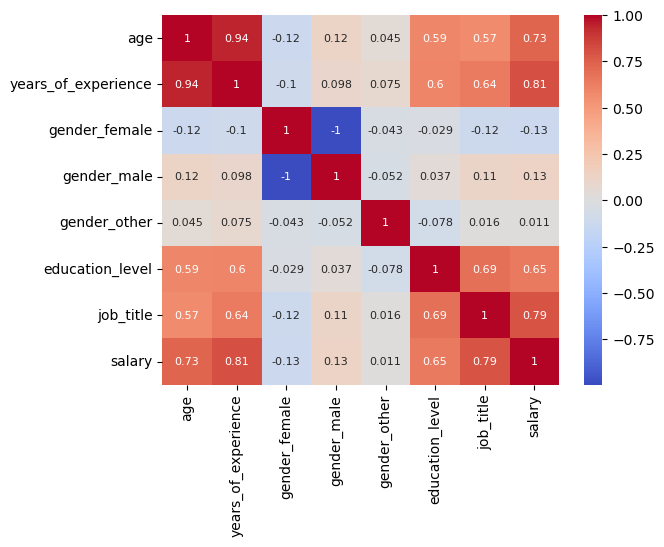

In [45]:
heatmap_df = X_train_.copy()
heatmap_df['salary'] = y_train
sns.heatmap(heatmap_df.corr(), annot=True, cmap='coolwarm', annot_kws={'size': 8})

## save fig
plt.savefig(os.path.join(images_dir, 'features_heatmap.png'),
            bbox_inches='tight')
## show fig
plt.show()

<font size='6'>Training</font>

In [83]:
from sklearn.linear_model import (
    LinearRegression,
    Ridge,
    Lasso, 
    ElasticNet,
    SGDRegressor,
)
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb


from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error
)

from skopt import BayesSearchCV
from skopt.space import (
    Real,
    Integer,
    Categorical
)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import (
    Input, Dense, Dropout, Activation
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import mse, mae
from keras.saving import load_model

import keras_tuner as kt

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

In [84]:
X_train
# X_train_
# y_train

,age,gender,education_level,job_title,years_of_experience
3858,27,male,High School,Junior Sales Associate,2.0
4786,30,female,Bachelor,Junior Marketing Manager,4.0
2739,48,male,PhD,Director of Data Science,18.0
191,30,female,Bachelor,Junior Social Media Manager,3.0
2294,30,female,Bachelor,Software Engineer,5.0
...,...,...,...,...,...
664,30,female,PhD,Data Scientist,7.0
3276,35,female,Master,Data Analyst,9.0
1318,27,male,Bachelor,Front end Developer,3.0
723,27,male,Bachelor,Software Engineer,4.0


<font size='4'>fit</font>

In [85]:
## RandomForestRegressor
RR = RandomForestRegressor()
RR.fit(X_train_, y_train)
y_pred_RR = (RR.predict(X_test_))

rr_df = X_test.copy()
rr_df['true'] = y_test
rr_df['predict'] = y_pred_RR
rr_df['diff'] = y_test - y_pred_RR



print(f'mae: {mae(y_pred_RR, y_test)}')

mae: 3398.3935546875


In [86]:
import xgboost as xgb
import lightgbm as lgb

In [87]:
xgb_reg = xgb.XGBRegressor()
params = {
    'verbose': -1,
    'n_estimators': 200,
    'max_depth': 5,
}
lgb_reg = lgb.LGBMClassifier(**params)

xgb_reg.fit(X_train_, y_train) 
lgb_reg.fit(X_train_, y_train) 

y_pred_xgb = xgb_reg.predict(X_test_)
y_pred_lgb = lgb_reg.predict(X_test_)

print(f'xgb mae: {mae(y_test, y_pred_xgb)}')
print(f'lgb mae: {mae(y_test, y_pred_lgb)}')

KeyboardInterrupt: 

In [ ]:
parm_space = [
    {
        'penalty': Categorical(['elasticnet']),
        'alpha': Real(1e-5, 1e+1, prior='log-uniform'),
        'max_iter': Integer(1000, 5000, prior='uniform'),
        'tol': Real(1e-5, 1e-3, prior='log-uniform'),
        'l1_ratio': Real(0.1, 0.9, prior='uniform'),
        'learning_rate': Categorical(['adaptive', 'constant']),
        'eta0': Real(1e-3, 1, prior='log-uniform'),
    },
    {
        'penalty': Categorical(['l1']),
        'alpha': Real(1e-5, 1e+1, prior='log-uniform'),
        'max_iter': Integer(1000, 5000, prior='uniform'),
        'tol': Real(1e-5, 1e-3, prior='log-uniform'),
        'learning_rate': Categorical(['adaptive', 'constant']),
        'eta0': Real(1e-3, 1, prior='log-uniform'),
    },
    {
        'penalty': Categorical(['l2']),
        'alpha': Real(1e-5, 1e+1, prior='log-uniform'),
        'max_iter': Integer(1000, 5000, prior='uniform'),
        'tol': Real(1e-5, 1e-3, prior='log-uniform'),
        'learning_rate': Categorical(['adaptive', 'constant']),
        'eta0': Real(1e-3, 1, prior='log-uniform'),
    },
]

common_paras = {
    'n_iter': 30,
    'cv': 5,
    'n_jobs': -1,
    # 'random_state': 34,
    'scoring': 'neg_mean_squared_error',
}

linear_model = BayesSearchCV(
    estimator=SGDRegressor(early_stopping=True),
    search_spaces=parm_space,
    **common_paras,
    # verbose=0,
)

linear_model.fit(X_train_, y_train)
y_pred_ln = linear_model.predict(X_test_)



In [ ]:
ln_df = X_test.copy()
ln_df['true_salary'] = y_test

ln_df[f'predict'] = y_pred_ln
ln_df[f'difference'] = ln_df['true_salary'] - ln_df[f'predict']

ln_df

,age,gender,education_level,job_title,years_of_experience,true_salary,predict,difference
6565,36,male,Bachelor,Sales Director,6.0,75000,92858.117237,-17858.117237
1514,54,male,PhD,Software Engineer Manager,17.0,195000,190398.835869,4601.164131
6237,29,male,Bachelor,Marketing Analyst,4.0,75000,68317.602538,6682.397462
5460,26,female,Bachelor,Social Media Manager,3.0,55000,82734.653124,-27734.653124
5314,28,male,Bachelor,Product Designer,3.0,60000,56758.278095,3241.721905
...,...,...,...,...,...,...,...,...
4473,41,male,PhD,Data Scientist,15.0,157000,179594.514671,-22594.514671
6617,28,male,PhD,Marketing Manager,4.0,55000,97697.170285,-42697.170285
1036,25,female,Bachelor,Data Analyst,2.0,100000,85246.948389,14753.051611
2008,31,female,Bachelor,Front end Developer,6.0,110000,92401.253128,17598.746872


<font size='6'>Assess Model</font>

In [ ]:
parm_dict = linear_model.best_params_
if parm_dict.get('penalty', '') != 'elasticnet':
    parm_dict.pop('l1_ratio', None)

print(f"Linear Model:")
for i, v in parm_dict.items():
    # print(type(i), type(v))
    if type(v) == float:
        print(f"    {i}: {v:.6f}")
    else :
        print(f"    {i}: {v}")

print(f"    mse: {mean_squared_error(y_test, y_pred_ln):.2f}")
print(f"    mae: {mean_absolute_error(y_test, y_pred_ln):.2f}")

Linear Model:
    alpha: 0.000428
    eta0: 0.054702
    learning_rate: adaptive
    max_iter: 2797
    penalty: l1
    tol: 0.000130
    mse: 481347390.69
    mae: 16563.29


<font size='6'>Predict</font>

Given an exmaple, we should predict it</br>
assume example has no NaN

In [ ]:
df.columns.difference(['salary'], sort=False)

Index(['age', 'gender', 'education_level', 'job_title', 'years_of_experience'], dtype='object')

In [ ]:
example_dataset = np.array([
    [26, 'Male', "Master", "Data Analyst", 0],
    [26, 'Female', "Master", "Data Analyst", 0],
    [27, 'Male', "Master", "Data Analyst", 0],
    [27, 'Female', "Master", "Data Analyst", 0],
    [27, 'Male', "Master", "Data Analyst", 1],
    [27, 'Female', "Master", "Data Analyst", 1],
])

example_df = pd.DataFrame(example_dataset,
                          columns=df \
                            .columns \
                            .difference(['salary'], sort=False))

data_cleaning(example_df)
# example_df.info()

example_df_ = features_pipeline.transform(example_df)
# example_df_

y_pred_ex = linear_model.predict(example_df_)
example_df['predict_linear'] = y_pred_ex

if is_poly:
    print("Using Polynomial_LinearModel")
else :
    print("Using LinearModel")

example_df

rename column - Successful ...
cleaning age - Successful ...
cleaning gender - Successful ...
cleaning education level - Successful ...
cleaning job title - Successful ...
cleaning years of experience - Successful ...
... Finishing Cleaning Process ...
Using Polynomial_LinearModel


,age,gender,education_level,job_title,years_of_experience,predict_linear
0,26,male,Master,Data Analyst,0.0,51025.559751
1,26,female,Master,Data Analyst,0.0,48852.371865
2,27,male,Master,Data Analyst,0.0,45792.383442
3,27,female,Master,Data Analyst,0.0,43619.195556
4,27,male,Master,Data Analyst,1.0,61496.779131
5,27,female,Master,Data Analyst,1.0,59323.591244


<font size='6' color='lightblue'>Neural Network</font>

In [ ]:
X_train
X_train_
y_train
# X_test
# X_test_
# y_test


3858     35000
4786     57000
2739    210000
191      45000
2294     90000
         ...  
664     185000
3276    120000
1318     80000
723     140000
2863    180367
Name: salary, Length: 5356, dtype: int32

In [ ]:
tuner_json_path = os.path.join(os.getcwd(), 'untitled_project/tuner0.json')
## remove tuner0.json 
if os.path.isfile(tuner_json_path):
    os.remove(tuner_json_path)

def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(X_train_.shape[1],)))

    for i in range(1, 5):
        units_setting = hp.Int(f"unit_{i}", min_value=32, max_value=1024, step=32)
        acti_setting = hp.Choice(f"acti_{i}", ['relu', 'tanh'])
        model.add(Dense(units=units_setting, activation=acti_setting))

    model.add(Dense(1, activation=hp.Choice('acti_output', ['linear', 'relu'])))

    lr = hp.Float('lr', min_value=1e-4, max_value=1e-1, sampling='log') 

    model.compile(
        optimizer=Adam(learning_rate=lr),
        loss='mse',
        metrics=['mae']
    )
    return model

tuner = kt.BayesianOptimization(
    hypermodel=build_model,
    objective=kt.Objective('val_loss',
                           direction='min'),
    max_trials=30,
    num_initial_points=10,
)

tuner.search(
    X_train_, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=125,
    shuffle=True,
    callbacks=[keras.callbacks.EarlyStopping(patience=5)],
    verbose=2,
)

Trial 30 Complete [00h 00m 03s]
val_loss: 404629856.0

Best val_loss So Far: 244602976.0
Total elapsed time: 00h 03m 17s


In [ ]:
## load model
# best_NN_model = load_model(os.path.join(model_dir, 'NN_model.keras'))

## get best parameters from tuner
best_hyperparms = tuner.get_best_hyperparameters(num_trials=1)[0]

## get best model from tuner
best_NN_model = tuner.get_best_models(num_models=1)[0]

## show best model summary
best_NN_model.summary()

## use best model to predict
y_pred_NN = best_NN_model.predict(X_test_)



/opt/anaconda3/envs/ML_env/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 800)            │         8,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1024)           │       820,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │        32,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 862,913 (3.29 MB)

 Trainable params: 862,913 (3.29 MB)

 Non-trainable params: 0 (0.00 B)

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
## build a new model using tuner best parameters
new_NN_model = tuner.hypermodel.build(best_hyperparms)

## document history by creating another model
history = new_NN_model.fit(
    X_train_, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=128,
    shuffle=True,
    verbose=2)

Epoch 1/100
34/34 - 1s - 40ms/step - loss: 4217723648.0000 - mae: 47766.6992 - val_loss: 1033344896.0000 - val_mae: 24186.8320
Epoch 2/100
34/34 - 0s - 6ms/step - loss: 621431296.0000 - mae: 18767.4316 - val_loss: 489907616.0000 - val_mae: 16595.8398
Epoch 3/100
34/34 - 0s - 6ms/step - loss: 488543296.0000 - mae: 16857.0645 - val_loss: 440270016.0000 - val_mae: 15974.1436
Epoch 4/100
34/34 - 0s - 6ms/step - loss: 434931808.0000 - mae: 15828.7764 - val_loss: 397081600.0000 - val_mae: 15178.0654
Epoch 5/100
34/34 - 0s - 6ms/step - loss: 486577376.0000 - mae: 17118.1660 - val_loss: 388020512.0000 - val_mae: 15037.3945
Epoch 6/100
34/34 - 0s - 6ms/step - loss: 396756000.0000 - mae: 15190.7764 - val_loss: 392665184.0000 - val_mae: 15655.4121
Epoch 7/100
34/34 - 0s - 6ms/step - loss: 394400640.0000 - mae: 15276.8281 - val_loss: 418017472.0000 - val_mae: 15887.9756
Epoch 8/100
34/34 - 0s - 6ms/step - loss: 395837312.0000 - mae: 15177.0273 - val_loss: 392011104.0000 - val_mae: 15369.6709
Epoch

In [ ]:
NN_df = X_test.copy()
NN_df['true_salary'] = y_test
y_pred_NN = new_NN_model.predict(X_test_)
NN_df['predict'] = y_pred_NN
NN_df['diff_NN'] = NN_df['true_salary'] - NN_df['predict']
NN_df

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,age,gender,education_level,job_title,years_of_experience,true_salary,predict,diff_NN
6565,36,male,Bachelor,Sales Director,6.0,75000,77502.265625,-2502.265625
1514,54,male,PhD,Software Engineer Manager,17.0,195000,200468.171875,-5468.171875
6237,29,male,Bachelor,Marketing Analyst,4.0,75000,69467.710938,5532.289062
5460,26,female,Bachelor,Social Media Manager,3.0,55000,61625.683594,-6625.683594
5314,28,male,Bachelor,Product Designer,3.0,60000,61391.855469,-1391.855469
...,...,...,...,...,...,...,...,...
4473,41,male,PhD,Data Scientist,15.0,157000,163547.000000,-6547.000000
6617,28,male,PhD,Marketing Manager,4.0,55000,57352.011719,-2352.011719
1036,25,female,Bachelor,Data Analyst,2.0,100000,99097.656250,902.343750
2008,31,female,Bachelor,Front end Developer,6.0,110000,91756.593750,18243.406250


<font size='6'>Assess Model</font>

Neural Network Model:
    mse: 146478272.00
    mae: 7592.57


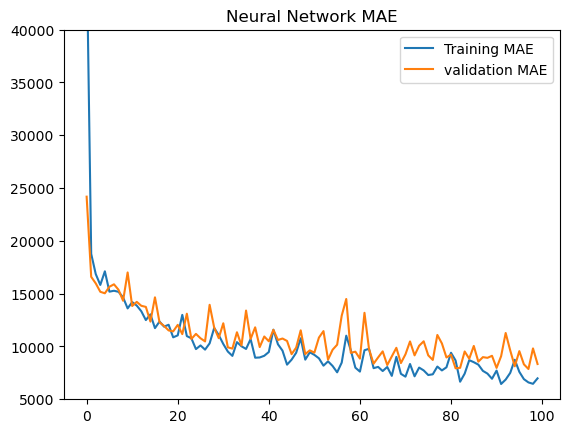

In [ ]:
print("Neural Network Model:")
print(f"    mse: {mean_squared_error(y_test, y_pred_NN):.2f}")
print(f"    mae: {mean_absolute_error(y_test, y_pred_NN):.2f}")

# model.evaluate(X_test_, y_test)
plt.plot(history.history['mae'], label='Training MAE') # loss, mae, val_loss, val_mae
plt.plot(history.history['val_mae'], label='validation MAE')
plt.ylim(5000, 40000)
plt.legend()
plt.title('Neural Network MAE')
plt.show()

<font size='6'>Save Model</font>

In [ ]:
os.makedirs(name='models', mode=0o755, exist_ok=True)
model_dir = os.path.join(os.getcwd(), 'models') 
best_NN_model.save(os.path.join(model_dir, 'NN_model.keras'))

In [ ]:
for i, v in best_hyperparms.values.items():
    print(i, v)


unit_1 800
acti_1 tanh
unit_2 1024
acti_2 relu
unit_3 32
acti_3 relu
unit_4 32
acti_4 relu
acti_output relu
lr 0.1


<font size='6'>Predict</font>

In [ ]:
y_pred_ex_ = new_NN_model.predict(example_df_)
example_df['predict_neural'] = y_pred_ex_
example_df

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


,age,gender,education_level,job_title,years_of_experience,predict_linear,predict_neural
0,26,male,Master,Data Analyst,0.0,51025.559751,50747.867188
1,26,female,Master,Data Analyst,0.0,48852.371865,62619.800781
2,27,male,Master,Data Analyst,0.0,45792.383442,49794.699219
3,27,female,Master,Data Analyst,0.0,43619.195556,55978.019531
4,27,male,Master,Data Analyst,1.0,61496.779131,56856.871094
5,27,female,Master,Data Analyst,1.0,59323.591244,63078.449219
